<h1>WKB calculations in slow--fast systems</h1>

This Jupyter notebook illustrates the use of the routines in hc.py and mc_gh.py that implement the WKB solution for a class of slow--fast reaction systems. The mathematical background can be found in my paper "Stationary and time-dependent molecular distributions in slow--fast feedback circuits" (referred from here on as "the paper"). 

mc_hg.py is used to define the model. It provides a mother class SlowFastModel that implements the general framework; it also provides two daughter classes, DelayedFeedback and GeneAutoregulation, which implement the two specific model examples described in the paper.

hc.py is used to define perform the WKB calculations. The class PhasePlane, that is instantiated with a SlowFastModel object, evaluates the Hamiltonian, its derivatives, and related quantities (e.g., the LNA coefficients). The class WentzelKramersBrillouin, which is instantiated with a PhasePlane object, provides routines for the calculation of the heteroclinic connection in the phase plane (thereby determining the potential derivative), integration routines, and prefactor calculation routines.

Below follows a simple example of the use of the routines.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import hc
import mc_gh as mc

Initialise the required objects.

In [3]:
model = mc.GeneAutoregulation(a0=0.3, a1=1.9, n=4, omega=10., b=1)
pp = hc.PhasePlane(model.A)

As an example of what we can do with the PhasePlane object, we plot the phase line of the deterministic rate equation.

Text(0.5, 0, 'x')

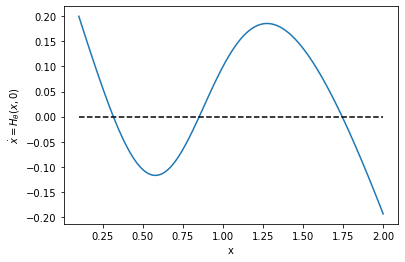

In [4]:
x = np.linspace(0.1, 2.0, 101)
Hth = np.ndarray(shape=x.shape)
for i in range(len(x)):
   Hth[i] = pp.Hth(x[i])
plt.plot(x,Hth)
plt.plot([0.1,2],[0,0],'--k') 
ax = plt.gca()
ax.set_ylabel("$\\dot{x} = H_{\\theta}(x,0)$")
ax.set_xlabel("x")

The WentzelKramersBrillouin class contains useful routines that work with the phase plane.

In [5]:
wkb = hc.WentzelKramsersBrillouin(pp)

Let us find the fixed points.

In [6]:
wkb.findfps(guesses=[0.3, 1., 1.9])

The wkb object now contains these new data.

The coordinates of the fixed points:

In [7]:
wkb.fps

[0.31574626819198276, 0.851784485314706, 1.7438770425168004]

Linearisations of the deterministic rate equation at the fixed points:

In [8]:
wkb.lin_at_fps

[-0.802483143442644, 0.6975803980974788, -0.6768373735305815]

Potential flatness around the fixed points

In [9]:
wkb.d2phi_at_fps

[2.5218163795018826, -0.7840829725788055, 0.38763325557309947]

Let us calculate the wkb potential.

In [10]:
wkb.findpotential(xmin=0.075,xmax=2.5)

We can calculate the potential barrier:

In [11]:
wkb.phi(wkb.fps[1]) - wkb.phi(wkb.fps[0])

0.07689251002181455

Text(0, 0.5, '$\\Phi(x)$')

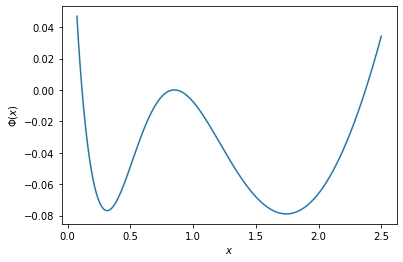

In [12]:
x = np.linspace(0.075,2.5,201)
plt.plot(x,wkb.phi(x))
ax = plt.gca()
ax.set_xlabel('$x$')
ax.set_ylabel("$\\Phi(x)$")

The first and second potential derivatives are also available

Text(0, 0.5, "$\\Phi'(x)$")

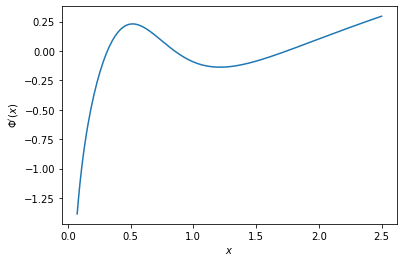

In [13]:
plt.plot(x,wkb.dphi(x))
ax = plt.gca()
ax.set_xlabel('$x$')
ax.set_ylabel("$\\Phi'(x)$")

Text(0, 0.5, "$\\Phi''(x)$")

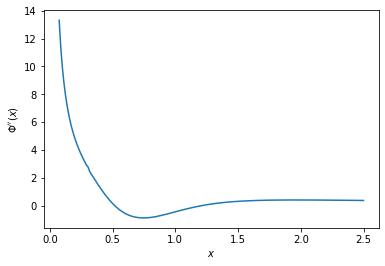

In [14]:
plt.plot(x,wkb.d2phi(x))
ax = plt.gca()
ax.set_xlabel('$x$')
ax.set_ylabel("$\\Phi''(x)$")

Finally, the prefactor. The avoidfps parameter is used to avoid numerical unstability of the method around fixed points.

/home/pavol/Documents/Programming/PythonFiles/GitHub/slowfast/hc.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  return num/denom


Text(0, 0.5, '$k(x)$')

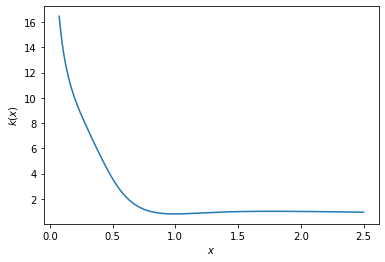

In [15]:
wkb.findprefactor(avoidfps = 0.05)
k = lambda x: np.exp(-wkb.psi(x))
plt.plot(x,k(x))
ax = plt.gca()
ax.set_xlabel('$x$')
ax.set_ylabel("$k(x)$")